# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [55]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [56]:
def normal_data(data, data_name):
    print(data.shape)
    print(f"The {data_name} dataset has {data.shape[0]} rows and {data.shape[1]} columns")
    print("The column names are: ", data.columns.to_list())

normal_data(df_tesla, "tesla")
df_tesla.head()

(124, 3)
The tesla dataset has 124 rows and 3 columns
The column names are:  ['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE']


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [57]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [58]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [59]:
normal_data(df_unemployment, "unemployment")
df_unemployment.head()

(181, 3)
The unemployment dataset has 181 rows and 3 columns
The column names are:  ['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE']


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [60]:
print(f'Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [61]:
normal_data(df_btc_search, "bitcoin search")
df_btc_search.head()

(73, 2)
The bitcoin search dataset has 73 rows and 2 columns
The column names are:  ['MONTH', 'BTC_NEWS_SEARCH']


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [62]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [63]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


### Answers
* We can see now that on every dataset the periodicity of time series data is of months 
* Numeric values indicate the search interest in comparison to the highest point on the chart for the specified region and time. A score of 100 signifies the peak popularity of the term, while a score of 50 indicates that the term is halfway as popular. A score of 0 signifies insufficient data for the term.

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [64]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [65]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [66]:
print(f'Number of missing values: {df_btc_price.isna().sum()}')

Number of missing values: DATE      0
CLOSE     1
VOLUME    1
dtype: int64


**Challenge**: Remove any missing values that you found. 

In [67]:
df_btc_price = df_btc_price.dropna()

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [68]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [69]:
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])

In [70]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   181 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64  
 2   UNRATE                  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [71]:
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])

In [72]:
df_btc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [73]:
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [74]:
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [75]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [76]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [77]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

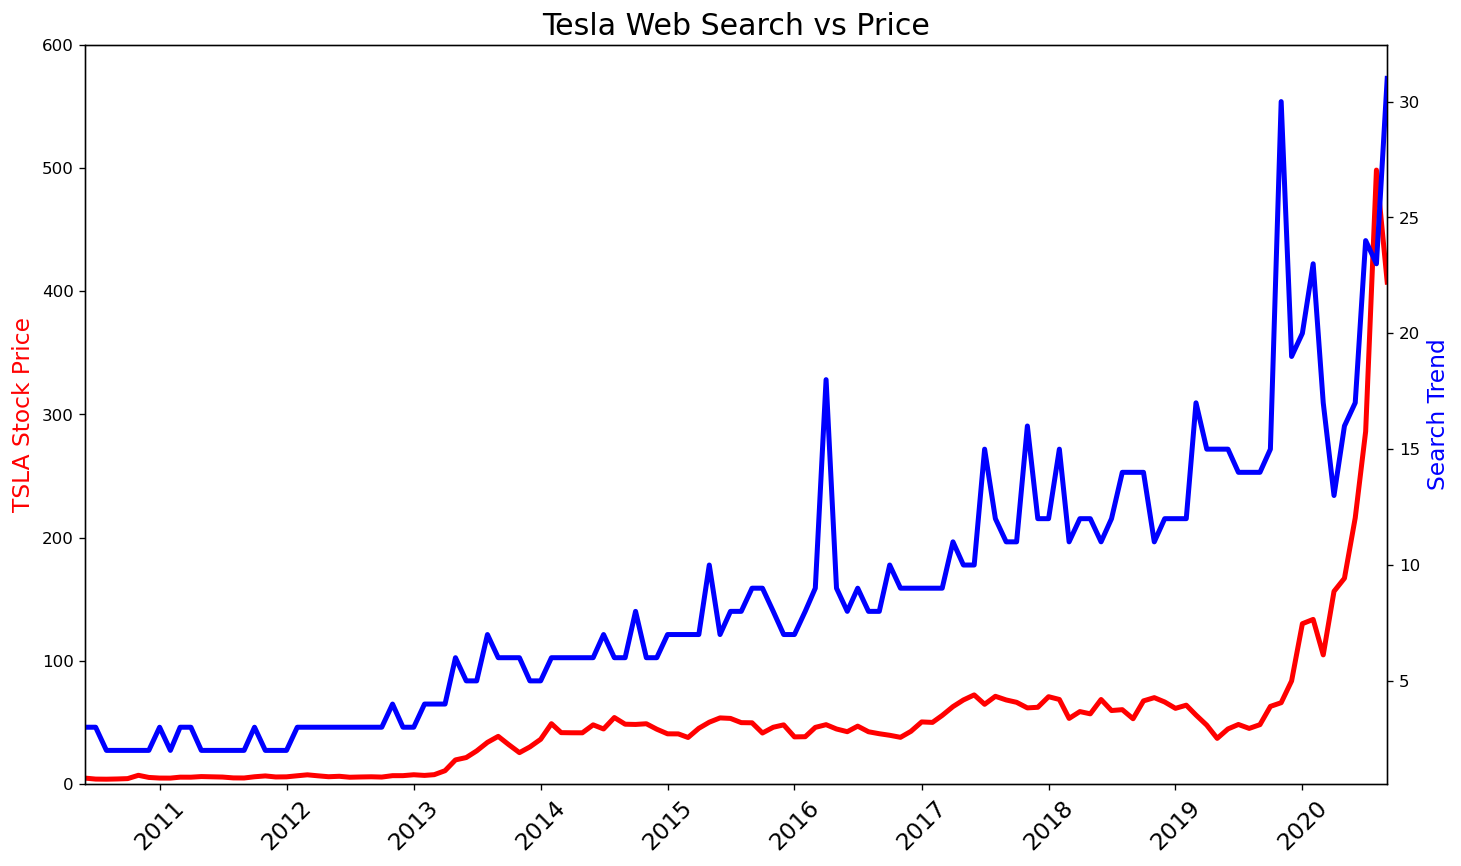

In [78]:
fig, ax = plt.subplots(figsize=(14,8), dpi=120)
plt.xticks(rotation=45, fontsize=14)
ax2 = ax.twinx()

ax.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="r", linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="b", linewidth=3)

ax.set_title("Tesla Web Search vs Price", fontsize=18)
ax.set_ylabel('TSLA Stock Price', color='r', fontsize=14)
ax.set_ylim([0, 600])
ax.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax2.set_ylabel("Search Trend", color="b", fontsize=14)

plt.show()


### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

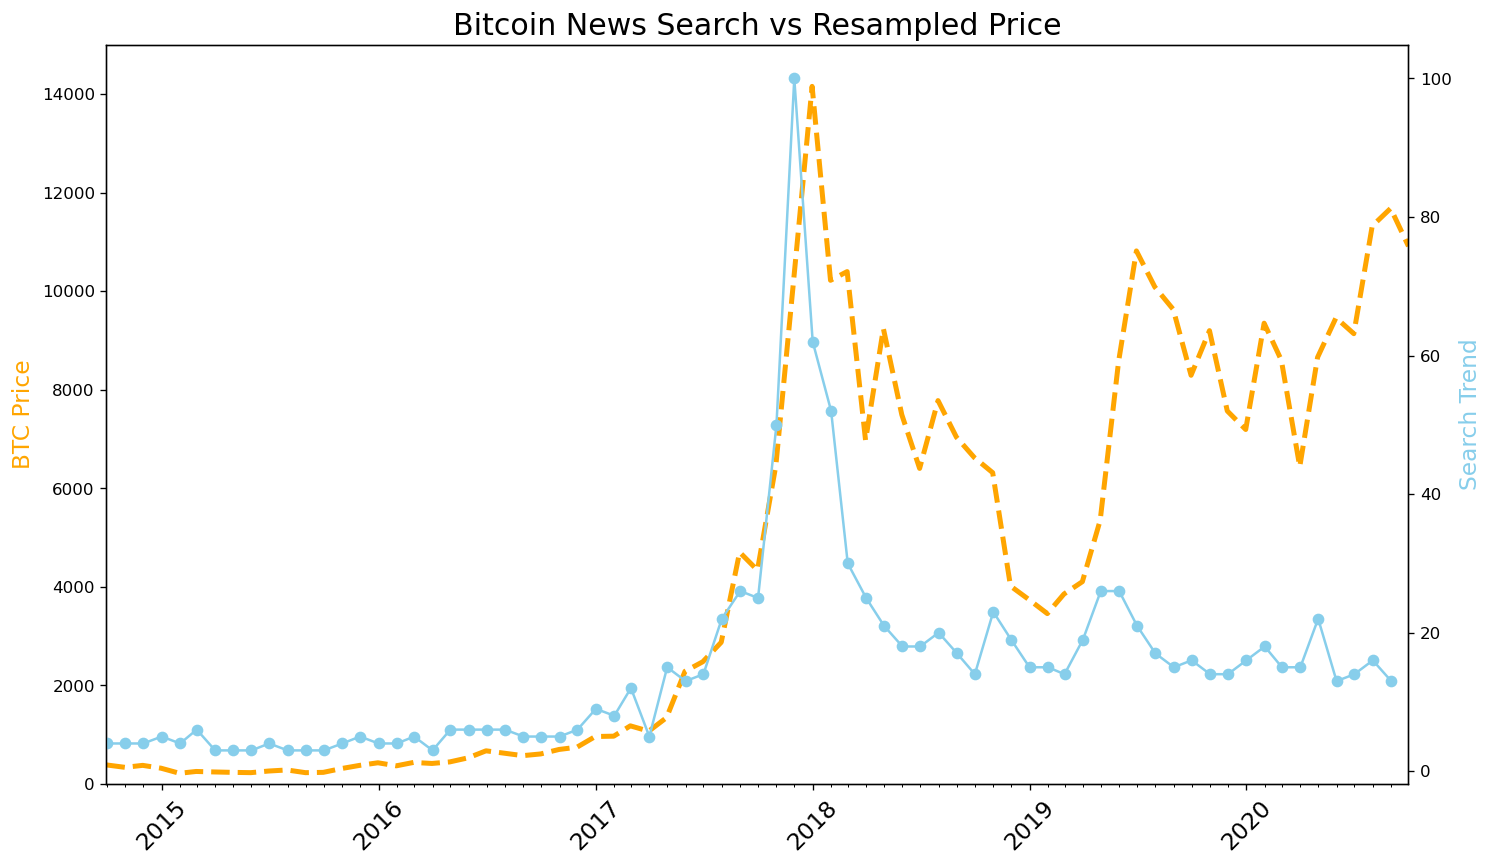

In [79]:
fig = plt.figure(figsize=(14,8), dpi=120)

plt.xticks(fontsize=14, rotation=45)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(df_btc_monthly.index, df_btc_monthly["CLOSE"], '--', color='orange', linewidth=3)
ax2.plot(df_btc_search["MONTH"],df_btc_search["BTC_NEWS_SEARCH"], marker='o',color='skyblue')

ax.set_ylabel("BTC Price", fontsize=14, color='orange')
ax2.set_ylabel("Search Trend", fontsize=14, color='skyblue')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.set_ylim(bottom=0, top=15000)
plt.xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

plt.show()

### Answer
Yes, big increase in search accompanied by a big increase in price

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

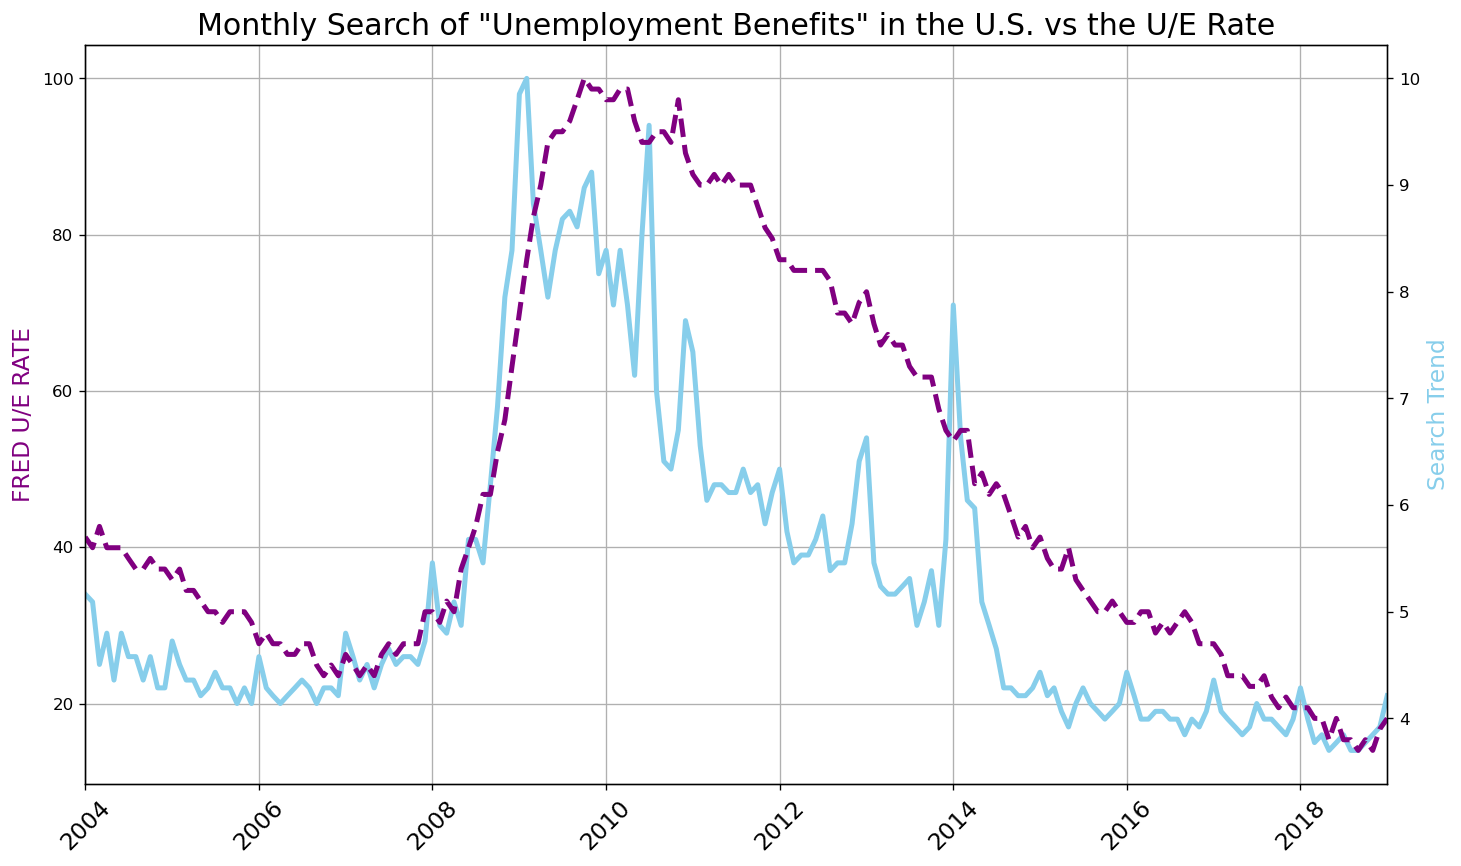

In [84]:
fig, ax = plt.subplots(figsize=(14,8), dpi=120)
plt.xticks(rotation=45, fontsize=14)

ax2 = ax.twinx()

ax.plot(df_unemployment["MONTH"], df_unemployment["UE_BENEFITS_WEB_SEARCH"], color="skyblue", linewidth=3)
ax2.plot(df_unemployment["MONTH"], df_unemployment["UNRATE"], '--',color="purple", linewidth=3)

ax.set_title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax.set_ylabel('FRED U/E RATE', color='purple', fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)

ax.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])
ax.grid()

plt.show()

### Answer
It's look that every time that a year end or it's ending the year the searches increase about this topic

## Challenge: 
Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


Text(0, 0.5, 'Search Trend')

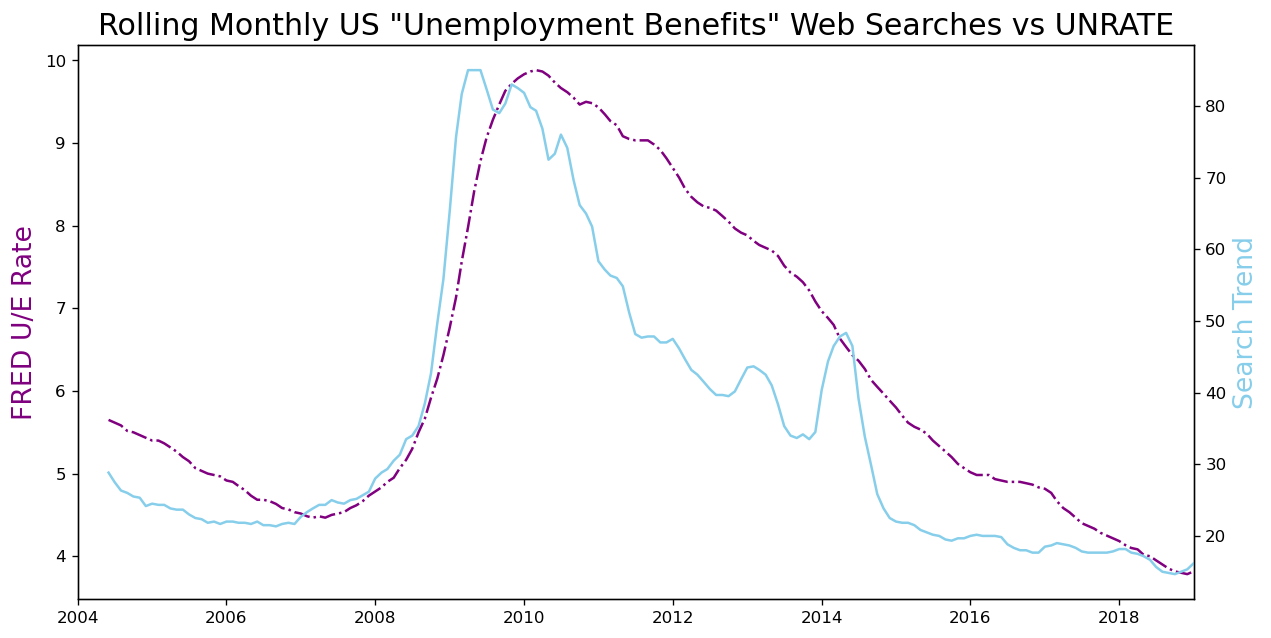

In [81]:
roll_df = df_unemployment[["UE_BENEFITS_WEB_SEARCH","UNRATE"]].rolling(window=6).mean()

fig, ax = plt.subplots(figsize=(12,6), dpi=120)
ax2 = ax.twinx()

ax.plot(df_unemployment["MONTH"], roll_df["UNRATE"], "-.",color="purple")
ax2.plot(df_unemployment["MONTH"], roll_df["UE_BENEFITS_WEB_SEARCH"] , color="skyblue")

ax.set_title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
ax.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)


### Answer
How it's look the search line increase and decrease before the other one